In [1]:
import os
from astropy.coordinates import SkyCoord
from astropy import units as u

import healpy as hp
from healpy.newvisufunc import projview, newprojplot

import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
import h5py

from astropy.io import fits
import pandas as pd
from numpy.linalg import norm

In [2]:
# Load the interpolation FITS file
folder_path = 'samples_healpix.fits'
hdul = fits.open(folder_path)

# See what’s inside
hdul.info()

# Access the primary header and data
primary_header = hdul[0].header
primary_data = hdul[0].data  # Usually 2D or 3D array

# If there are extensions
for i in range(1, len(hdul)):
    print(f"Extension {i}:", hdul[i].header.get('EXTNAME'))
    # You can access extension data like this:
    ext_data = hdul[i].data
    ext_header = hdul[i].header

Filename: samples_healpix.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  SAMPLES       1 ImageHDU        21   (786432, 516, 12)   float32   
  2  RADIAL PIXEL CENTERS    1 BinTableHDU     20   516R x 1C   [E]   
  3  RADIAL PIXEL BOUNDARIES    1 BinTableHDU     20   517R x 1C   [E]   
  4  INTEGRATED INNER 68.8 PC    1 ImageHDU        18   (786432, 12)   float32   
Extension 1: SAMPLES
Extension 2: RADIAL PIXEL CENTERS
Extension 3: RADIAL PIXEL BOUNDARIES
Extension 4: INTEGRATED INNER 68.8 PC


In [3]:
# Get the distances
r = hdul[2].data['radial pixel centers']    # max 1248pc
dAv_hpx = hdul[1].data
dAv_hpx_sample=dAv_hpx[0]
dAv_hpx_sample.shape

(516, 786432)

In [4]:
with fits.open(folder_path) as hdul:
    ordering = hdul[0].header.get('ORDERING', 'RING')  # default assume RING
    print("Pixel ordering from header:", ordering)

Pixel ordering from header: RING


In [ ]:
# saving Dust map to .FITS
hdu = fits.PrimaryHDU(data=dAv_hpx_sample)
hdu.header['RADIUS'] = round(r[0], 5)  # Save the corresponding radius if available
hdu.writeto("dust_density_shell_extraction.fits", overwrite=True)

In [5]:
r

array([  68.811874,   69.19981 ,   69.58993 ,   69.98224 ,   70.37677 ,
         70.77352 ,   71.172516,   71.57375 ,   71.97726 ,   72.38303 ,
         72.79109 ,   73.20146 ,   73.614136,   74.029144,   74.44649 ,
         74.86618 ,   75.288246,   75.712685,   76.13952 ,   76.56876 ,
         77.00042 ,   77.43452 ,   77.87106 ,   78.31007 ,   78.75154 ,
         79.1955  ,   79.641975,   80.090965,   80.54248 ,   80.996544,
         81.45316 ,   81.91236 ,   82.37415 ,   82.83854 ,   83.30555 ,
         83.775185,   84.247475,   84.72243 ,   85.20005 ,   85.680374,
         86.1634  ,   86.649155,   87.13764 ,   87.62888 ,   88.1229  ,
         88.6197  ,   89.11929 ,   89.62171 ,   90.12696 ,   90.635056,
         91.14602 ,   91.65986 ,   92.1766  ,   92.69624 ,   93.21883 ,
         93.744354,   94.27284 ,   94.80431 ,   95.338776,   95.87626 ,
         96.41676 ,   96.96032 ,   97.50694 ,   98.05664 ,   98.60944 ,
         99.16536 ,   99.72441 ,  100.28661 ,  100.85198 ,  101.

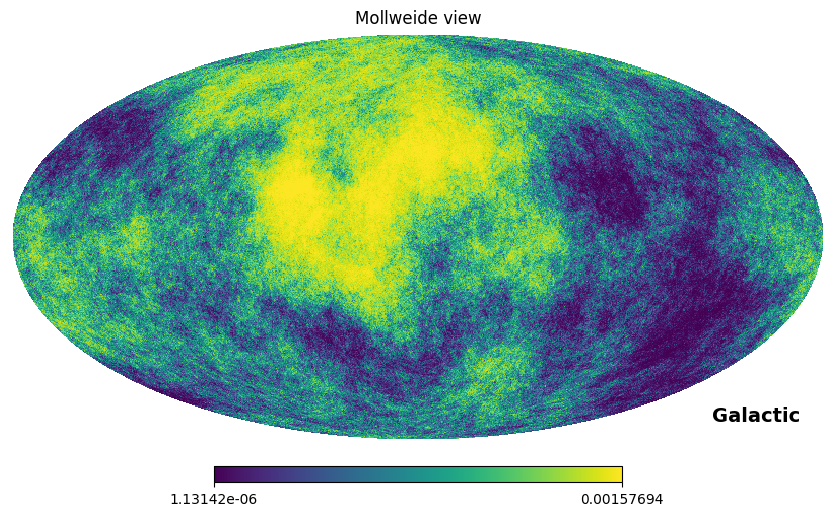

In [18]:
# integrate out to ? pc -- check array: r
dmax = 100
Av = dAv_hpx_sample[r <dmax,:].sum(axis=0)
cartmap = hp.mollview(dAv_hpx_sample[1],\
                          
                          coord = 'G',\
                          
                          #lonra = [-180,180], latra = [-30,30],\
                          return_projected_map=True, norm='hist', nest=True)
    

# Integrate to r_min to r_max

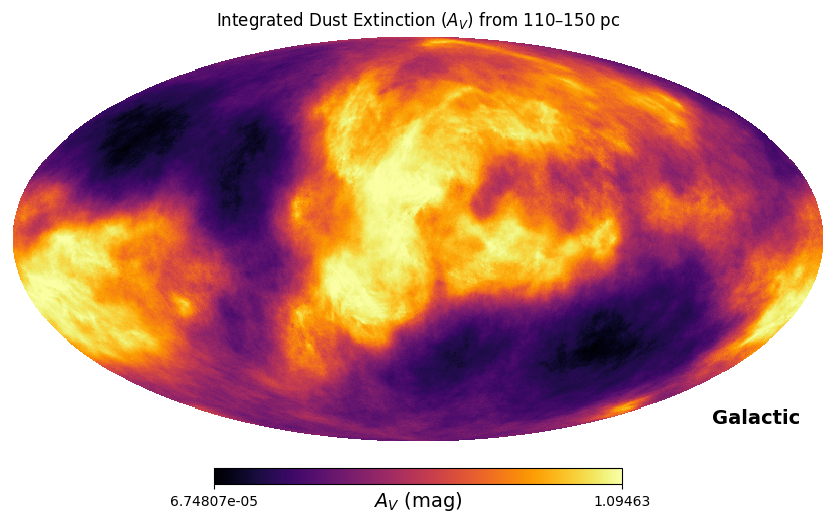

In [ ]:
d_min = 110# in pc
d_max = 150  # in pc

# Create mask for the desired shell range
shell_mask = (r >= d_min) & (r < d_max)

# Sum over the selected shells
Av = dAv_hpx_sample[shell_mask, :].sum(axis=0)

# Plot with title, units, and features
cartmap = hp.mollview(
    Av,
    coord='G',
    nest=True,
    return_projected_map=True,
    norm='hist',
    title=f"Integrated Dust Extinction ($A_V$) from {d_min}–{d_max} pc",
    unit='$A_V$ (mag)',
    cmap='inferno',       # Optional: better contrast than default
    cbar=True,            # Show colorbar
    notext=False,         # Show tick labels
)

